## T08-Distribuciones de probabilidad
Terezza Marianne González Jáuregui

24/10/2024

1.- Un proyecto de construcción está por comenzar. Se hace la compra de los materiales y el proveedor dice que en promedio tardan una semana con una desviación de 3 días en llegar. Una vez llegados los materiales se tarda entre 3 y 5 semanas en construir (uniforme). Después de la construcción se deben esperar 3 días antes de empezar a pintar, y toma 6 días en promedio con 2 días de desviación estándar hacerlo.

a) Describe en una celda qué distribución usarías para cada paso del proceso

b) Simula cada paso en el proceso un millón de veces

c) Agrupa las simulaciones de cada paso para tener la simulación del proceso completo

d) ¿Cuál es el tiempo promedio para de inicio-fin del proyecto?

e) De acuerdo a tus simulaciones, ¿cuál es el peor caso? ¿cuál es el mejor caso?

f) Si el proyecto se tiene que entregar a más tardar en 50 días o se tiene que pagar una compensación al cliente, ¿cuál es la probabilidad de que el proyecto se entregue a tiempo?

g) ¿Cuál es la probabilidad de que el proyecto tome entre 20 y 40 días?

Respuestas:

a) Descripción de las distribuciones utilizadas
* Llegada de materiales: Usamos una distribución normal con media de 7 días y desviación estándar de 3 días.
* Construcción: Usamos una distribución uniforme entre 3 y 5 semanas.
* Espera para pintar: Es un valor constante de 3 días.
* Pintura: Usamos una distribución normal con media de 6 días y desviación estándar de 2 días.

b) Materiales:

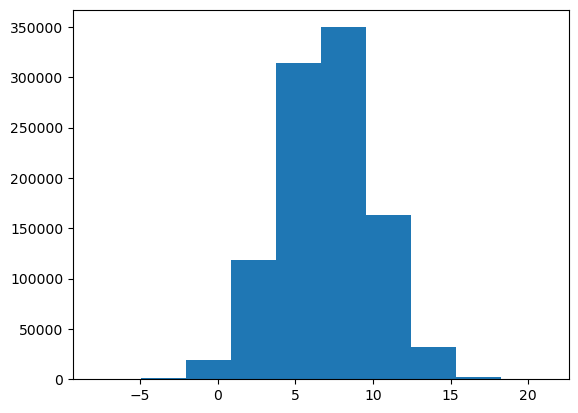

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n=1000000
des=3
mu = 7
plt.hist(np.random.normal(mu, des, n));

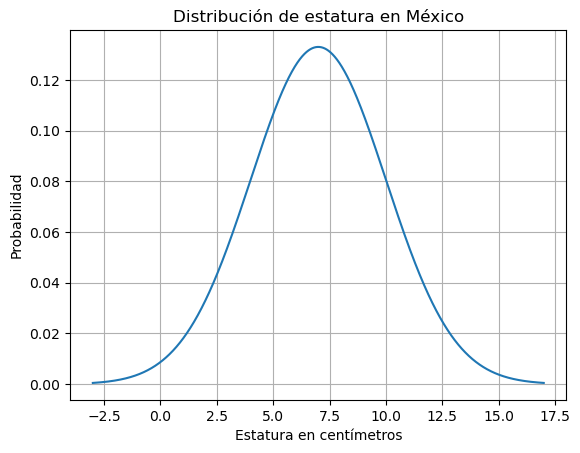

In [24]:
import numpy as np; h = np.linspace(-3, 17, 1000000); mu = 7; std=3;
plt.figure(); plt.plot(h, np.exp( -(h - mu)**2/(2*std**2) )/np.sqrt(2*np.pi*std**2)); 
plt.grid(); plt.xlabel("Estatura en centímetros"); plt.ylabel("Probabilidad"); plt.title("Distribución de estatura en México");

In [ ]:
def materiales(x,me,des):
    return (((np.exp(( -(x - mu)**2)/(2*std**2))*(1/(np.sqrt(2*np.pi*des**2))))

In [28]:
import numpy as np
n = 1000000 #simular el proceso un millon de veces

#a) Distribuciones para cada paso del proceso
# Tiempo de llegada de materiales (normal con media 7 días y desviación estándar 3 días)
tiempo_materiales = np.random.normal(7, 3, n)

#tiempo de construcción (uniforme entre 3 y 5 semanas -> entre 21 y 35 días)
tiempo_construccion = np.random.uniform(21, 35, n)
#tiempo de espera antes de pintar 
tiempo_espera = 3

#tiempo de pintura 
tiempo_pintura = np.random.normal(6, 2, n)

#tiempo total del proyecto
tiempo_total = tiempo_materiales + tiempo_construccion + tiempo_espera + tiempo_pintura

# d) estimar el tiempo promedio del proyecto
tiempo_promedio = np.mean(tiempo_total) #promedio
print(tiempo_promedio)

#e) el mejor y peor caso en tiempo
mejor_caso = np.min(tiempo_total)
peor_caso = np.max(tiempo_total)
print(mejor_caso, peor_caso)

#f) Probabilidad de que se entregue a tiempo en 50 dias
prob_atiempo = np.mean(tiempo_total <= 50) * 100
print(prob_atiempo)

#g) Probabilidad de que el proyecto tome entre 20 y 40 días
prob_20_40_dias = np.mean((tiempo_total >= 20) & (tiempo_total <= 40)) * 100
print(prob_20_40_dias)

43.99943035993467
19.607747167381405 64.92614632567232
85.75789999999999
24.3559


2.- Hay un elevador pequeño en una plaza donde se espera que entren máximo 4 personas a la vez, y su capacidad de peso para poder operar es de 300 kg. En el último censo se encontró que habían 378350 personas en la zona:

* 185392 mujeres
* 162690 hombres
* 30268 personas que o prefirieron no dar la información o se identificaron como no binarias

El peso promedio medido en mujeres es de 70 kg con una desviación estándar de 11 kg. En los hombres se midió un peso promedio de 80 kg y una desviación estándar de 16 kg. En el tercer grupo se midió un peso promedio de 73 kg con una desviación estándar de 12 kg.

a) Si el elevador se llenara 10,000 veces, ¿cuántas de esas veces se excedería el peso permitido?

b) ¿Qué peso total tendría que soportar el elevador si se quiere que el 95% de las veces que se llene no se exceda el peso permitido?

In [30]:
import numpy as np
n = 10000
#datos en kg mujeres
promedio_mujeres = 70
desv_est_mujeres = 11
#datos en kg hombres
promedio_hombres = 80
desv_est_hombres = 16
#tercer grupo en kg
promedio_otros = 73
desv_est_otros = 12

p_mujeres = 185392 / 378350
p_hombres = 162690 / 378350
p_otros = 30268 / 378350 #no informacion 
#capacidad máxima que se puede estar en el elevador en kg
peso_maximo = 300


# Simulación del peso total en el elevador (4 personas por vez)
excesos = 0
for i in range(n):
    #4 personas al azar
    personas = np.random.choice(['mujer', 'hombre', 'otros'], size=4, p=[p_mujeres, p_hombres, p_otros])
    
    # Calculamos el peso total
    peso_total = 0
    for persona in personas:
        if persona == 'mujer':
            peso_total += np.random.normal(promedio_mujeres, desv_est_mujeres) #distribucion normal
        elif persona == 'hombre':
            peso_total += np.random.normal(promedio_hombres, desv_est_hombres)
        else:
            peso_total += np.random.normal(promedio_otros, desv_est_otros)
    
    #si se excede el peso máximo
    if peso_total > peso_maximo:
        excesos += 1
p_exceso = (excesos/n)*100
p_exceso

46.0

In [34]:
#b
from scipy.stats import norm

media_total = 4 * (p_mujeres * promedio_mujeres + p_hombres * promedio_hombres + p_otros * promedio_otros)

varianza_total = 4 * (p_mujeres * desv_est_mujeres**2 + p_hombres * desv_est_hombres**2 + p_otros * desv_est_otros**2)
desv_est_total = np.sqrt(varianza_total)

# Percentil 95 %95
percentil = norm.ppf(0.95, loc=media_total, scale=desv_est_total)
percentil

342.404959184342

3.- Tienes diez dados justos. Si arrojas todos al mismo tiempo, ¿cuál es la probabilidad de que la suma de los dados sea múltiplo de 6?

In [36]:
import numpy as np

n = 1000000
dados = np.random.randint(1, 7, (n, 10))

# Calcula la suma de los 10 dados para cada simulación
sumas = np.sum(dados, axis=1)

multiplo_de_6 = np.sum(sumas % 6 == 0)
probabilidad = multiplo_de_6 / n_simulaciones
probabilidad

NameError: name 'n_simulaciones' is not defined

4.- A y B juegan al siguiente juego: un número k del 1 al 6 es elegido, y A y B avientan el dado por turnos hasta que alguien consiga que el dado caiga en k. El ganador recibe $100.

a) ¿Cuál es la probabilidad de que el primer jugador gane?

b) ¿Cuál es la probabilidad de que el segundo jugador gane?

c) ¿Cuánto vale la pena pagar para ir primero?

In [38]:
import numpy as np

# Definir el número de simulaciones
n = 1000000

# Probabilidad de que salga el número en un dado (1/6)
probabilidad_dado = 1/6
#iniciadores
jugador1 = 0
jugador2 = 0
for i in range(n):
    turno = 1  
    while True:
        if np.random.rand() < probabilidad_dado:  
            if turno == 1:
                jugador1 += 1
            else:
                jugador2 += 1
            break
        turno = 2 if turno == 1 else 1  

prob_jugador1 = jugador1 / n
prob_jugador2 = jugador2 / n
prob_jugador1, prob_jugador2

(0.545847, 0.454153)

In [40]:
prob_jugador1 = 0.545118
premio = 100

# Valor esperado de ir primero
paga = prob_jugador1 * premio
paga

54.5118